# 実践コンピュータビジョン
# 5章 多視点幾何
## 5.4 ステレオ画像
テキストp.124

### ステレオビジョンの定義
２つのカメラの間のずれが水平（横）方向のみにある場合、この多視点画像をステレオビジョンにあたる。<br>
2枚の画像が同じ画像平面上にあって、画像の高さが揃うようにカメラを設定することを平行化（レクティファイ）するという。
またそのように設置したものをステレオリグという。

### 5.4.1 視差マップを計算する
ここでは、ある一定の範囲のズレの中で、ピクセルごとに周辺画像の正規化相互相関の値を調べ、<br>
最良の値になる場合のズレの量を記録する、ステレオ復元のアルゴリズムを用いる。

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [19]:
# オリジナルモジュール
import stereo

平面走査をして各ピクセルの最良の視差を返す関数plane_sweep_ncc()を以下に示す。<br>
この関数をstereoモジュールに入れる。

In [20]:
def plane_sweep_ncc(im_l,im_r,start,steps,wid):
    """ 正規化相互相関を用いて視差画像を求める """

    m,n = im_l.shape

    # 差の和を格納する配列
    mean_l = np.zeros((m,n))
    mean_r = np.zeros((m,n))
    s = np.zeros((m,n))
    s_l = np.zeros((m,n))
    s_r = np.zeros((m,n))

    # 奥行き平面を格納する配列
    dmaps = np.zeros((m,n,steps))

    # パッチの平均を計算する
    filters.uniform_filter(im_l,wid,mean_l)
    filters.uniform_filter(im_r,wid,mean_r)

    # 画像を正規化する
    norm_l = im_l - mean_l
    norm_r = im_r - mean_r

    # 視差を順番に試していく
    for displ in range(steps):
        # 左の画像を右にずらして和を計算する
        filters.uniform_filter(roll(norm_l,-displ-start)*
                               norm_r,wid,s) # 分子の和
        filters.uniform_filter(roll(norm_l,-displ-start)*
                               roll(norm_l,-displ-start),wid,s_l)
        filters.uniform_filter(norm_r*norm_r,wid,s_r) # 分母の和

        # 相互相関の値を保存する
        dmaps[:,:,displ] = s/np.sqrt(s_l*s_r)

        # 各ピクセルで最良の奥行きを選ぶ
        return argmax(dmaps,axis=2)

### (1) 画像データtsukuba
古典的なデータセット「tsukuba」から２枚の画像を読み込んで、視差マップを作成する。

Middlebury Stereo Datasets:  
http://vision.middlebury.edu/stereo/data/

Tsukuba:  
http://vision.middlebury.edu/stereo/data/scenes2001/data/tsukuba/

In [21]:
# tsukubaデータセットから２枚の写真を選んで、グレースケールに変換する
im_l = np.array(Image.open('tsukuba/scene1.row3.col3.ppm').convert('L'),'f')
im_r = np.array(Image.open('tsukuba/scene1.row3.col4.ppm').convert('L'),'f')

In [22]:
# 視差の開始値と調べる範囲
start = 4
steps = 12   # for tsukuba

# 相互相関を調べるパッチの幅
wid = 9

In [23]:
# 正規相互相関を用いて視差画像を求める
res = stereo.plane_sweep_ncc(im_l,im_r,start,steps,wid)

In [24]:
# scipy.miscモジュールで画像データを保存する
import scipy.misc
scipy.misc.imsave('tsukuba/depth.png',res)

In [25]:
# ２枚目の写真について、視差画像を求める
wid = 3
res2 = stereo.plane_sweep_gauss(im_l,im_r,start,steps,wid)
scipy.misc.imsave('tsukuba/depthg.png',res2)

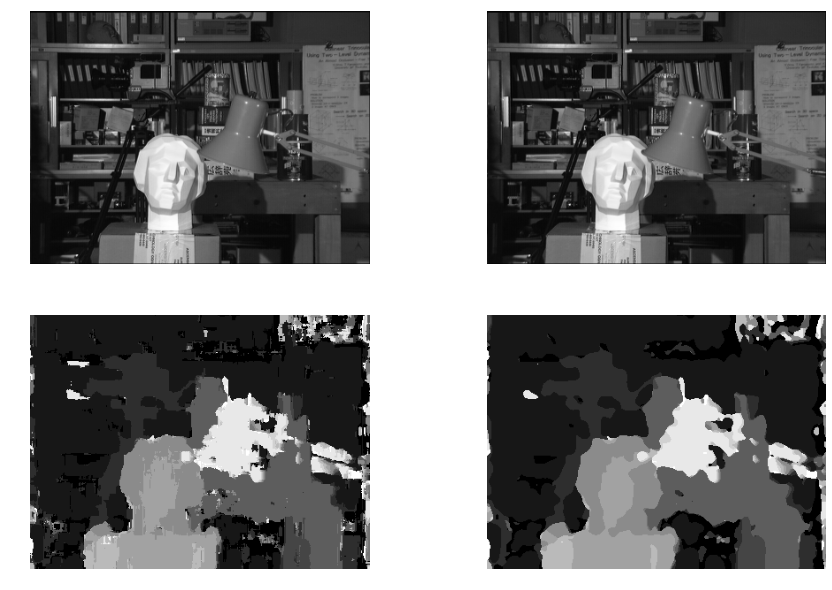

In [26]:
# オリジナルの画像と視差画像を表示する
imlist = [im_l, im_r, res, res2]
plt.figure(figsize=(15,10))
plt.gray()
for i, im in zip(range(4), imlist):
    plt.subplot(2,2, i+1)
    plt.imshow(im)
    plt.axis('off')
plt.show()

### (2) 画像データcones
同じくMiddlebury Stereo Datasetsの中からConesデータセットを利用する。

Cones:  
http://vision.middlebury.edu/stereo/data/scenes2003/newdata/cones/

In [27]:
# conesデータセットの画像を読み込んでグレースケールに変換する
im_l = np.array(Image.open('cones/im2.png').convert('L'),'f')
im_r = np.array(Image.open('cones/im6.png').convert('L'),'f')

In [28]:
# 視差の開始値と調べる範囲
start = 4
# steps = 12   # for tsukuba
steps = 50    # for cones

# １枚目の写真の処理
wid = 9
res = stereo.plane_sweep_ncc(im_l,im_r,start,steps,wid)
scipy.misc.imsave('cones/depth_cone.png',res)

# 2枚目の写真の処理
wid = 3
res2 = stereo.plane_sweep_gauss(im_l,im_r,start,steps,wid)
scipy.misc.imsave('cones/depthg_cone.png',res2)

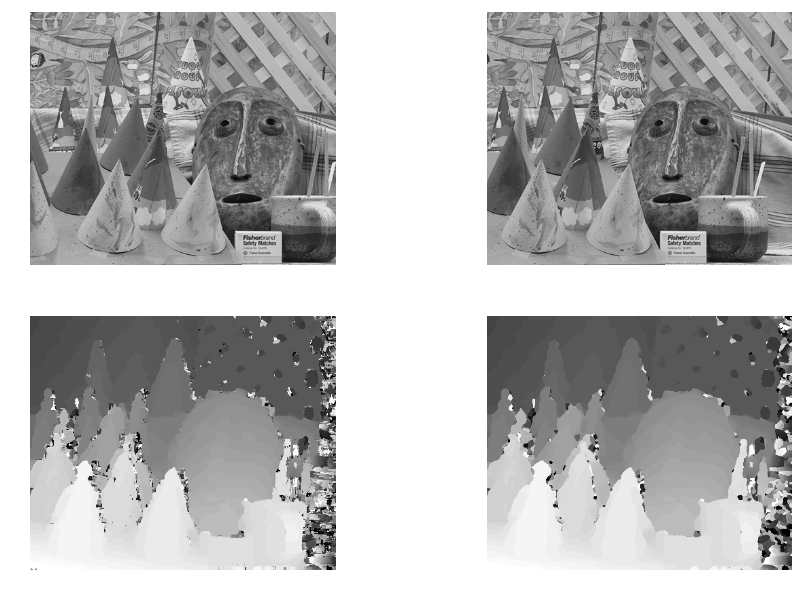

In [29]:
# オリジナルの画像と視差画像を表示する
imlist = [im_l, im_r, res, res2]
plt.figure(figsize=(15,10))
plt.gray()
for i, im in zip(range(4), imlist):
    plt.subplot(2,2, i+1)
    plt.imshow(im)
    plt.axis('off')
plt.show()